## Demo code to apply the CNN spike ripple detector

In this notebook, you will load an example time series data, apply the trained CNN spike ripple detector, and visualize the results.

### Import libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load local functions in `demo_functions.py`

There are 3 functions to:
- Create the spectrogram image files (`make_spectra_image_files` and `hannspecgramc`).
- Compute and apply the CNN for spike ripple classification (`compute_CNN`).

If you'd like to print out and see these functions, uncomment the line below.

In [19]:
%run demo_functions
# %load demo_functions    # Run this line to see the functions.

### Import the time series data
- `data` is the voltage time series,
- `time` is the corresponding time series (in seconds).

Both files are CSV files.

In [25]:
data = pd.read_csv('./demo_data/data.csv').values    # Data file
time = pd.read_csv('./demo_data/time.csv').values    # Time file

### Create spectra image files
Compute spectrograms for time series in `data`. Image files are saved to the folder `demo_data`.

In [15]:
[start_time_dict, stop_time_dict] = make_spectra_image_files(data, time)

### Apply pre-trained CNN to `data`

The pre-trained CNN uses the model in the file `saved_model.pkl`. This model was trained using the human EEG data with expert classification.

In [24]:
path_to_image_files         = "demo_spectra_images"
spike_ripple_predictions_df = compute_CNN(path_to_image_files, start_time_dict, stop_time_dict)

### Visualize results

Print the results of the dataframe, and plot the probability of a spike ripple as a function of time, and as a function of image number.

In [21]:
# Print results
spike_ripple_predictions_df

,image_number,prediction,probability,start time,stop time
0,10.jpg,0,0.003044,[5.003439803439799],[6.002948402948401]
1,38.jpg,0,0.000035,[19.010319410319397],[20.009828009828]
2,117.jpg,0,0.000008,[58.5297297297297],[59.529238329238304]
3,103.jpg,0,0.000572,[51.5262899262899],[52.5257985257985]
4,1.jpg,0,0.000070,[0.501228501228501],[1.5007371007371002]
...,...,...,...,...,...
192,127.jpg,0,0.000020,[63.5321867321867],[64.5316953316953]
193,126.jpg,0,0.000013,[63.031941031941],[64.0314496314496]
194,132.jpg,0,0.000257,[66.0334152334152],[67.0329238329238]
195,21.jpg,0,0.002390,[10.5061425061425],[11.505651105651099]


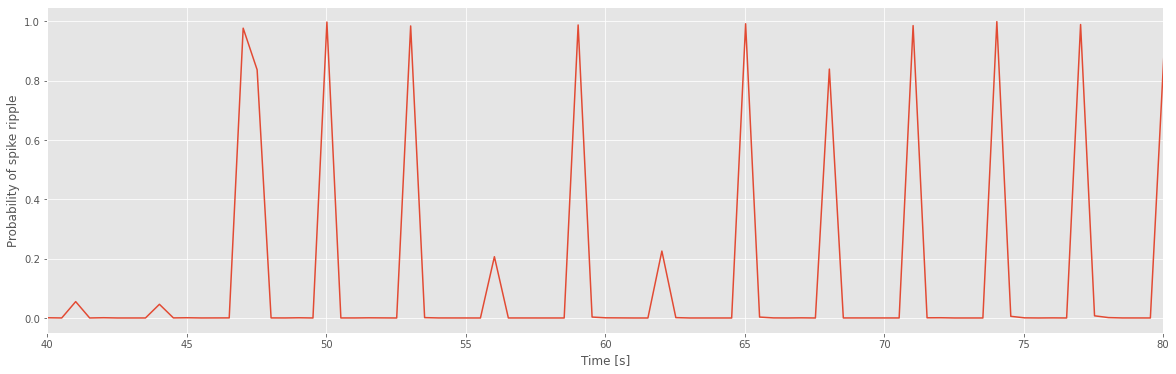

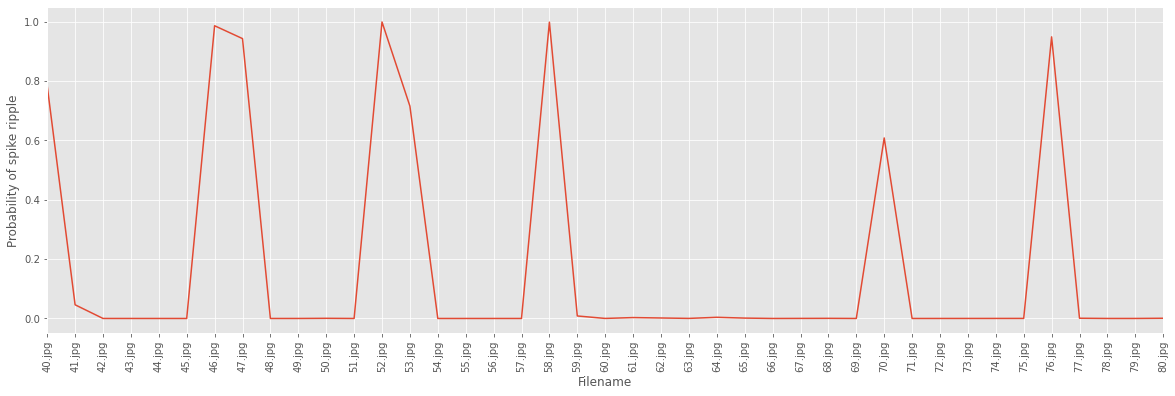

In [23]:
# Plot results.
prob      = spike_ripple_predictions_df["probability"]           # The probability of a spike ripple,
start_t   = spike_ripple_predictions_df["start time"]            # ... for each start time [s],
file_name = spike_ripple_predictions_df["image_number"]          # ... and for each image numbere.
i_sorted  = np.argsort(start_t)              # Get indices sorted by time.

figure(figsize=(20, 6))                      # Plot probability vs time.
plt.plot(start_t[i_sorted],prob[i_sorted])
plt.xlabel('Time [s]'); plt.ylabel('Probability of spike ripple'); plt.xlim([40,80]);

figure(figsize=(20, 6)); xticks(rotation=90) # Plot probability vs file number.
plt.plot(file_name[i_sorted], prob[i_sorted])
plt.xlabel('Filename'); plt.ylabel('Probability of spike ripple'); plt.xlim([40,80]);